In [1]:
import os
import sys
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from datetime import datetime
from pathlib import Path
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
from matplotlib.patches import FancyArrowPatch

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from scipy.stats import linregress

import warnings

In [5]:
warnings.filterwarnings('ignore')

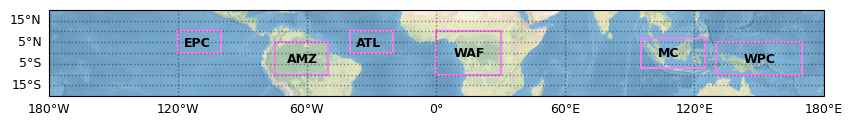

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,3),subplot_kw={'projection': ccrs.PlateCarree()})
ax.stock_img()

# plot regional boxes 
WPC = [-10,5,130,170]
IND = [-10,5,70,90]
EPC = [0,10,240,260]
ATL = [0,10,320,340]
WAF = [-10,10,0,30]
MC = [-7,7,95,125]
AMZ = [-10,5,285,310]

for (geo_info, label_str) in zip([WPC, EPC, ATL, WAF, MC, AMZ],
                                 ['WPC','EPC','ATL','WAF','MC','AMZ']):
    
    if geo_info[2] > 180:
        lon_val = geo_info[2] - 360
    else:
        lon_val = geo_info[2]
    
    rec = Rectangle(xy=(lon_val, geo_info[0]), width=geo_info[3]-geo_info[2],
             height=geo_info[1]-geo_info[0], facecolor='None',edgecolor='violet', lw=1.5)
    ax.add_patch(rec)
    # add labels for regions
    ax.text(x=lon_val+(geo_info[3]-geo_info[2])/2-7, y=geo_info[0]-2+(geo_info[1]-geo_info[0])/2, s=label_str
            , fontsize=9, fontweight='bold')

ax.set_ylim([-20,20])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k', alpha=0.4, linestyle=':')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 9, 'color': 'k'}
gl.ylabel_style = {'size': 9, 'color': 'k'}
fig.savefig('/scratch/wmtsai/temp_mcs/fig/geomap_selected_regions.pdf', 
        bbox_inches='tight', transparent=False)